<a href="https://colab.research.google.com/github/MochNad/Kecerd_Buatan/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
image = plt.imread('bunga.jpg')

# normalizing image
image = image / 255.

#reshaping image because kmeans algorithm takes 2D data as an input so converted 3D image to 2D image
image_reshaped = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
print("Shape of original image {}".format(image.shape))
print("Shape of reshaped image {}".format(image_reshaped.shape))

Shape of original image (419, 236, 3)
Shape of reshaped image (98884, 3)


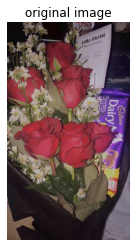

In [3]:
plt.axis('off')
plt.title("original image")
plt.imshow(image)

In [4]:
# it returns clustered pixels of an image

def kmeans_over_image(number_of_clusters, org_image, reshaped_image):

  kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
  kmeans = kmeans.fit(reshaped_image)
  image_cluster = kmeans.cluster_centers_[kmeans.labels_]

  # reshaping image size form 2D to 3D
  image_cluster = image_cluster.reshape(org_image.shape[0], org_image.shape[1], org_image.shape[2])

  return image_cluster

In [5]:
# for storing clustered image
clustered_images = []

# number of cluster
no_cluster = []

# for eaxmple
# forming clusters of 2,4,6,8 over input image

for cluster in range(2, 10, 2):
  # image --> original 3D image
  # image_reshaped ---> reshaped 2D image

  clustered_images.append(kmeans_over_image(cluster, image, image_reshaped))
  no_cluster.append(cluster)

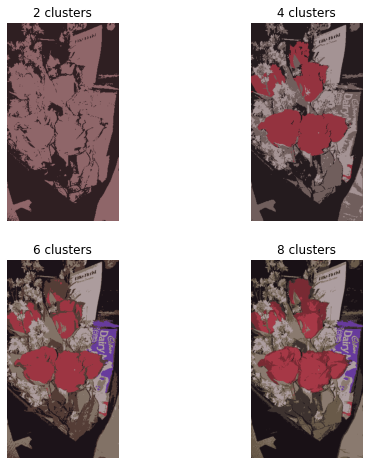

In [6]:
#plotting images
import numpy as np

fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 2
iterate = 0

for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.title(str(no_cluster[iterate]) + " clusters")
    plt.imshow(clustered_images[iterate])
    iterate += 1
plt.show()